In [9]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [10]:
# Время выживания (в месяцах)
survival_times = [14.5, 21.4, 33.0, 40.8, 58.5, 69.8, 70.2, 77.5, 85.0, 89.5, 94.0, 94.0, 97.0, 99.5, 103.8, 105.5, 105.5, 108.4, 110.0, 115.8, 118.0]

# Цензурированные наблюдения (True - цензурированное, False - нецензурированное)
censored = [True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False]

# Преобразуем данные в pandas DataFrame
data = pd.DataFrame({
    'survival_time': survival_times,
    'censored': censored
})

In [11]:
# Инициализируем модель Каплана-Мейера
kmf = KaplanMeierFitter()

# Обучаем модель на данных
kmf.fit(durations=data['survival_time'], event_observed=~data['censored'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 21 total observations, 6 right-censored observations>

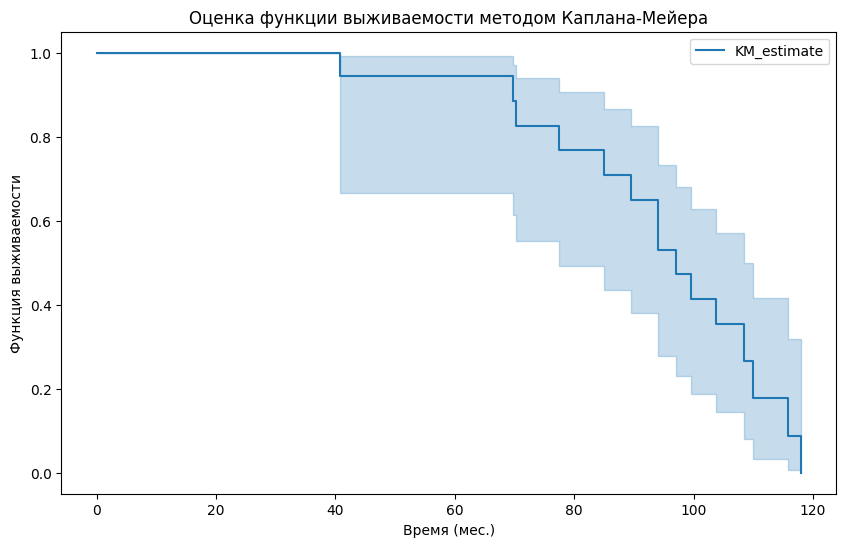

77.5     0.492276
85.0     0.434592
89.5     0.379615
94.0     0.277725
97.0     0.230814
99.5     0.186688
103.8    0.145520
105.5    0.145520
108.4    0.079770
110.0    0.033160
115.8    0.005945
118.0    0.000000
Name: KM_estimate_lower_0.95, dtype: float64
0.0      1.000000
14.5     1.000000
21.4     1.000000
33.0     1.000000
40.8     0.991983
58.5     0.991983
69.8     0.970104
70.2     0.940555
77.5     0.905800
85.0     0.867018
89.5     0.824859
94.0     0.731768
97.0     0.681151
99.5     0.627855
103.8    0.571787
105.5    0.571787
Name: KM_estimate_upper_0.95, dtype: float64
77.5 105.5
Средняя выживаемость: KM_estimate    0.619097
dtype: float64 месяцев


In [16]:
# Строим график функции выживаемости
plt.figure(figsize=(10, 6))
kmf.plot(ci_show=True)
plt.title("Оценка функции выживаемости методом Каплана-Мейера")
plt.xlabel("Время (мес.)")
plt.ylabel("Функция выживаемости")
plt.show()

ci_lower = kmf.confidence_interval_.iloc[:, 0]  # Нижняя граница
ci_upper = kmf.confidence_interval_.iloc[:, 1]  # Верхняя граница

# Находим моменты времени, где границы пересекают 0.5
ci_lower_median = ci_lower[ci_lower <= 0.5].index.min()
ci_upper_median = ci_upper[ci_upper >= 0.5].index.max()
print(ci_lower[ci_lower <= 0.5])
print(ci_upper[ci_upper >= 0.5])

print(ci_lower_median, ci_upper_median)

mean_survival = kmf.survival_function_.mean()
print(f"Средняя выживаемость: {mean_survival} месяцев")

In [13]:
# Вычисление медианы и доверительных интервалов
median_survival = kmf._median
ci_median = kmf.confidence_interval_

# Вычисление средней выживаемости
# mean_survival = kmf.mea

# Вывод результатов
print(f"Медиана выживаемости: {median_survival:.2f} месяцев")
print(f"95% доверительный интервал для медианы: {ci_median[0]:.2f} - {ci_median[1]:.2f} месяцев")

# print(f"Средняя выживаемость: {mean_survival:.2f} месяцев")

Медиана выживаемости: 97.00 месяцев


KeyError: 0

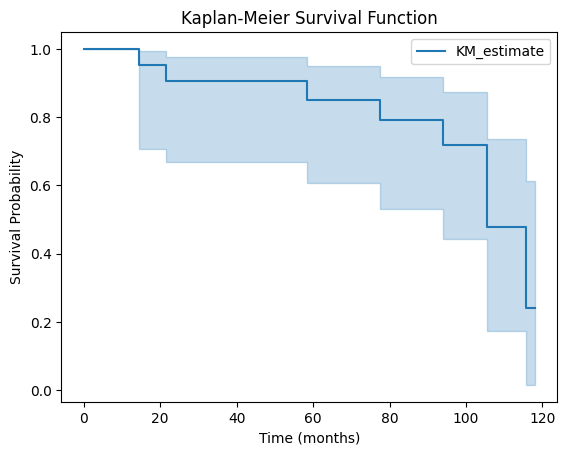

94.0     0.441905
97.0     0.441905
99.5     0.441905
103.8    0.441905
105.5    0.172779
108.4    0.172779
110.0    0.172779
115.8    0.015626
118.0    0.015626
Name: KM_estimate_lower_0.95, dtype: float64
0.0      1.000000
14.5     0.993152
21.4     0.975294
33.0     0.975294
40.8     0.975294
58.5     0.949746
69.8     0.949746
70.2     0.949746
77.5     0.916770
85.0     0.916770
89.5     0.916770
94.0     0.875071
97.0     0.875071
99.5     0.875071
103.8    0.875071
105.5    0.734779
108.4    0.734779
110.0    0.734779
115.8    0.612115
118.0    0.612115
Name: KM_estimate_upper_0.95, dtype: float64
Медиана выживаемости: 105.5 дней
95%-доверительный интервал медианы: (118.0, 0.0) дней
Медиана выживаемости: 105.5 месяцев
95% Доверительный интервал медианы:
       KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.0                  1.000000                1.000000
14.5                 0.707207                0.993152
21.4                 0.670046                0.975294
33.0         

In [8]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Данные
times = [14.5, 21.4, 33.0, 40.8, 58.5, 69.8, 70.2, 77.5, 85.0, 89.5, 94.0, 94.0, 97.0, 99.5, 103.8, 105.5, 105.5, 108.4, 110.0, 115.8, 118.0]
censored = [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]

# Построение КМ-оценки
kmf = KaplanMeierFitter()
kmf.fit(times, event_observed=censored)

# График функции выживаемости
kmf.plot_survival_function(ci_show=True)
plt.title("Kaplan-Meier Survival Function")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.show()


# Медиана
median_survival = kmf.median_survival_time_

# Доверительные интервалы
ci_lower = kmf.confidence_interval_.iloc[:, 0]  # Нижняя граница
ci_upper = kmf.confidence_interval_.iloc[:, 1]  # Верхняя граница

# Находим моменты времени, где границы пересекают 0.5
ci_lower_median = ci_lower[ci_lower <= 0.5].index.max()
ci_upper_median = ci_upper[ci_upper >= 0.5].index.min()
print(ci_lower[ci_lower <= 0.5])
print(ci_upper[ci_upper >= 0.5])

print(f"Медиана выживаемости: {median_survival} дней")
print(f"95%-доверительный интервал медианы: ({ci_lower_median}, {ci_upper_median}) дней")

# Медиана выживаемости
median_survival = kmf.median_survival_time_
print(f"Медиана выживаемости: {median_survival} месяцев")

# Доверительный интервал медианы
print("95% Доверительный интервал медианы:")
print(kmf.confidence_interval_survival_function_)

# Средняя выживаемость (временная оценка)
mean_survival = kmf.survival_function_.mean()
print(f"Средняя выживаемость: {mean_survival} месяцев")


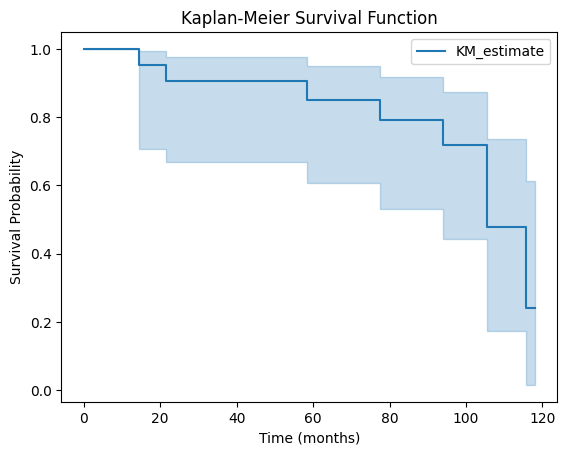

Доверительные интервалы функции выживаемости:
       KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.0                  1.000000                1.000000
14.5                 0.707207                0.993152
21.4                 0.670046                0.975294
33.0                 0.670046                0.975294
40.8                 0.670046                0.975294
58.5                 0.605981                0.949746
69.8                 0.605981                0.949746
70.2                 0.605981                0.949746
77.5                 0.530192                0.916770
85.0                 0.530192                0.916770
89.5                 0.530192                0.916770
94.0                 0.441905                0.875071
97.0                 0.441905                0.875071
99.5                 0.441905                0.875071
103.8                0.441905                0.875071
105.5                0.172779                0.734779
108.4                0.172779       

AttributeError: 'KaplanMeierFitter' object has no attribute 'confidence_interval_median_survival_time_'

In [2]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Данные
times = [14.5, 21.4, 33.0, 40.8, 58.5, 69.8, 70.2, 77.5, 85.0, 89.5, 94.0, 94.0, 97.0, 99.5, 103.8, 105.5, 105.5, 108.4, 110.0, 115.8, 118.0]
censored = [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]

# Построение КМ-оценки
kmf = KaplanMeierFitter()
kmf.fit(times, event_observed=censored)

# График функции выживаемости
kmf.plot_survival_function(ci_show=True)
plt.title("Kaplan-Meier Survival Function")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.show()

# Численные значения доверительных интервалов функции выживаемости
ci_sf = kmf.confidence_interval_survival_function_
print("Доверительные интервалы функции выживаемости:")
print(ci_sf)

# Медиана выживаемости
median_survival = kmf.median_survival_time_
print(f"Медиана выживаемости: {median_survival} месяцев")

# Доверительный интервал медианы (через встроенный метод)
ci_median = kmf.confidence_interval_median_survival_time_
print("95% Доверительный интервал медианы выживаемости:")
print(ci_median)

# Средняя выживаемость (оценка и бутстреп для доверительного интервала)
def bootstrap_mean_survival(times, censored, n_iterations=1000):
    mean_survivals = []
    n = len(times)
    for _ in range(n_iterations):
        indices = np.random.choice(range(n), size=n, replace=True)
        sampled_times = np.array(times)[indices]
        sampled_censored = np.array(censored)[indices]
        kmf_sample = KaplanMeierFitter()
        kmf_sample.fit(sampled_times, event_observed=sampled_censored)
        mean_survivals.append(kmf_sample.survival_function_.mean())
    return np.percentile(mean_survivals, [2.5, 97.5])

# Средняя выживаемость
mean_survival = kmf.survival_function_.mean()
ci_mean = bootstrap_mean_survival(times, censored)
print(f"Средняя выживаемость: {mean_survival:.2f} месяцев")
print(f"95% Доверительный интервал средней выживаемости: {ci_mean[0]:.2f} - {ci_mean[1]:.2f} месяцев")


In [4]:
# Данные
stage_3_times = [6, 19, 32, 42, 42, 43, 94, 126, 169, 207, 211, 227, 253, 255, 270, 310, 316, 335, 346]
stage_3_cens = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]

stage_4_times = [4, 6, 10, 11, 11, 11, 13, 17, 20, 20, 21, 22, 24, 24, 29, 30, 30, 31, 33, 34, 35, 39, 40, 41, 43, 45, 46, 50, 56, 61, 61, 63, 68, 82, 85, 88, 89, 90, 93, 104, 110, 134, 137, 160, 169, 171, 173, 175, 184, 201, 222, 235, 247, 260, 284, 290, 291, 302, 304, 341, 345]
stage_4_cens = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Проверка длины
assert len(stage_3_times) == len(stage_3_cens), "Размеры stage_3_times и stage_3_cens не совпадают!"
assert len(stage_4_times) == len(stage_4_cens), "Размеры stage_4_times и stage_4_cens не совпадают!"

# Объединенные данные
combined_times = stage_3_times + stage_4_times
combined_cens = stage_3_cens + stage_4_cens

# Проверка длины объединенных данных
assert len(combined_times) == len(combined_cens), "Размеры combined_times и combined_cens не совпадают!"


AssertionError: Размеры stage_4_times и stage_4_cens не совпадают!

In [3]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter, statistics
import matplotlib.pyplot as plt

# Данные
stage_3_times = [6, 19, 32, 42, 42, 43, 94, 126, 169, 207, 211, 227, 253, 255, 270, 310, 316, 335, 346]
stage_3_cens = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]

stage_4_times = [4, 6, 10, 11, 11, 11, 13, 17, 20, 20, 21, 22, 24, 24, 29, 30, 30, 31, 33, 34, 35, 39, 40, 41, 43, 45, 46, 50, 56, 61, 61, 63, 68, 82, 85, 88, 89, 90, 93, 104, 110, 134, 137, 160, 169, 171, 173, 175, 184, 201, 222, 235, 247, 260, 284, 290, 291, 302, 304, 341, 345]
stage_4_cens = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Объединенные данные
combined_times = stage_3_times + stage_4_times
combined_cens = stage_3_cens + stage_4_cens

# Оценка КМ для объединенных данных
kmf_combined = KaplanMeierFitter()
kmf_combined.fit(combined_times, event_observed=combined_cens)
kmf_combined.plot(ci_show=True)
plt.title("Kaplan-Meier Survival Function (Combined Data)")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.show()

# Среднее время выживания
mean_combined = kmf_combined.survival_function_.mean()
print(f"Среднее время выживания (объединенные данные): {mean_combined} дней")

# Оценка КМ для каждой группы
kmf_stage_3 = KaplanMeierFitter()
kmf_stage_3.fit(stage_3_times, event_observed=stage_3_cens, label="Stage 3")

kmf_stage_4 = KaplanMeierFitter()
kmf_stage_4.fit(stage_4_times, event_observed=stage_4_cens, label="Stage 4")

# Построение кривых
ax = kmf_stage_3.plot(ci_show=True)
kmf_stage_4.plot(ax=ax, ci_show=True)
plt.title("Kaplan-Meier Survival Function (By Stage)")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

# Лог-ранговый тест
results = statistics.logrank_test(stage_3_times, stage_4_times, event_observed_A=stage_3_cens, event_observed_B=stage_4_cens)
print(f"Log-rank test p-value: {results.p_value}")

# Тест Гехана-Бреслоу
results_gehan = statistics.multivariate_logrank_test(combined_times, [1]*len(stage_3_times) + [2]*len(stage_4_times), combined_cens)
print(f"Gehan-Breslow test p-value: {results_gehan.p_value}")


ValueError: cannot reshape array of size 78 into shape (80,)